#  Seasonal index

In [ ]:
## year: [int]

data = {
    "2016": [54,32,43,34],
    "2017": [43,23,41,38]
}

result = {}

# init result dict
for key in data.keys():
  result[key] = []


for i, key in enumerate(data.keys()):
  q_mean = sum(data[key])/len(data[key])
  print(key, "mean:", q_mean)
  for q_index in data[key]:
    result[key].append(round(q_index/q_mean, 3))

print()
print('seasonal index')
print(result)

means = []

for i in range(len(data[list(data.keys())[0]])):
  q_sum = 0.0
  for key in data.keys():
    q_sum += result[key][i]
  means.append(round(q_sum/len(data.keys()),3))

print()

print('deseasonalization')
for key in data.keys():
  print(key+ ": ", end='')

  for i, q_index in enumerate(data[key]):
    print(str(round(q_index/means[i], 3)) + "\t", end='')
  print()


[54, 32, 43, 34]


TypeError: ignored

# PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[12, 38.7], [22,35], [15,40], [26, 32.3]], dtype=np.float64)
# X = np.array([[12, 32, 33, 23], [14.5, 33,22,22], [11,31,11,22.5], [17,25,12,24]], dtype=np.float64)
k = 4 #you can select any number of components.

# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)
print(X)
print(X_meaned)
cov_mat = np.cov(X_meaned , rowvar = False)
print('\nCovariance Matrix')
print(cov_mat)
print()
print('Eigenvalues and Eigenvectors of the Covariance Matrix')
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
for i, eigen in enumerate(zip(eigen_values, eigen_vectors)):
  print(f'λ{i+1}=', eigen[0], 'eigenvector with unit length', eigen[1])

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# select the first n eigenvectors, n is desired dimension
# of our final reduced data.

print()
print('reuslt is sorted eigenvector, please *write first column result*')
eigenvector_subset = sorted_eigenvectors[:,0:k]
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)
print('Apply to X (real data)')
print(np.dot(eigenvector_subset.transpose(),X.transpose()).transpose())

[[12.  38.7]
 [22.  35. ]
 [15.  40. ]
 [26.  32.3]]
[[-6.75  2.2 ]
 [ 3.25 -1.5 ]
 [-3.75  3.5 ]
 [ 7.25 -4.2 ]]

Covariance Matrix
[[ 40.91666667 -21.1       ]
 [-21.1         12.32666667]]

Eigenvalues and Eigenvectors of the Covariance Matrix
λ1= 1.1352580338286504 eigenvector with unit length [-0.46856847 -0.88342719]
λ2= 52.10807529950469 eigenvector with unit length [-0.88342719  0.46856847]

reuslt is sorted eigenvector, please *write first column result*
[[ 6.99398413  1.21929734]
 [-3.57399105 -0.19770674]
 [ 4.95284158 -1.3348634 ]
 [-8.37283465  0.3132728 ]]
Apply to X (real data)
[[  7.53247341 -39.81145368]
 [ -3.03550178 -41.22845776]
 [  5.49133086 -42.36561442]
 [ -7.83434538 -40.71747822]]


# CNN

In [ ]:
from numpy.lib.stride_tricks import as_strided

img = np.array([
    [6,2,3,1,2,1,0],
    [3,1,1,4,2,2,3],
    [7,4,0,1,3,8,0],
    [0,1,4,0,1,3,1],
    [4,0,1,0,0,3,2],
    [1,0,0,2,3,2,3],
    [9,2,2,1,0,1,0],
    [8,4,6,5,1,1,2]],dtype=np.uint8)

kernel = np.array([
    [0,2,2],
    [1,1,1],
    [0,0,2]],dtype=np.uint8)

print('Image:')
print(img)
print('\nkernel:')
print(kernel)

def convolve2D(image, kernel, padding=0, strides=1):
    #kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        #print(imagePadded[x: x + xKernShape, y: y + yKernShape])
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
        

    return output


def pool2d(A, kernel_size, stride, padding=0, pool_mode='max'):
    A = np.pad(A, padding, mode='constant')

    # Window view of A
    output_shape = ((A.shape[0] - kernel_size) // stride + 1,
                    (A.shape[1] - kernel_size) // stride + 1)
    
    shape_w = (output_shape[0], output_shape[1], kernel_size, kernel_size)
    strides_w = (stride*A.strides[0], stride*A.strides[1], A.strides[0], A.strides[1])
    
    A_w = as_strided(A, shape_w, strides_w)

    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis=(2, 3))
    elif pool_mode == 'avg':
        return A_w.mean(axis=(2, 3))

con2D = convolve2D(img, kernel)
max_pooling = pool2d(con2D, 2, 1)
print('='*20)
print('Convolved Feature')
print(con2D)

print('\nMaxPooling')
print(max_pooling)

Image:
[[6 2 3 1 2 1 0]
 [3 1 1 4 2 2 3]
 [7 4 0 1 3 8 0]
 [0 1 4 0 1 3 1]
 [4 0 1 0 0 3 2]
 [1 0 0 2 3 2 3]
 [9 2 2 1 0 1 0]
 [8 4 6 5 1 1 2]]

kernel:
[[0 2 2]
 [1 1 1]
 [0 0 2]]
Convolved Feature
[[15. 16. 19. 30.  9.]
 [23. 15. 18. 26. 23.]
 [15.  7. 13. 32. 25.]
 [15. 13.  9. 15. 19.]
 [ 7.  6.  5. 15. 18.]
 [25. 19. 15. 14. 15.]]

MaxPooling
[[23. 19. 30. 30.]
 [23. 18. 32. 32.]
 [15. 13. 32. 32.]
 [15. 13. 15. 19.]
 [25. 19. 15. 18.]]


# Apriori Algorithm

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

dataset = [
    ['Apple', 'Banana', 'Strawberry'],
    ['Passion fruit', 'Pineapple'],
    ['Orange'],
    ['Apple', 'Passion fruit', 'Pineapple'],
    ['Apple', 'Banana', 'Passion fruit', 'Pineapple'],
]
# Number
# dataset = [
#     ['1','3','4'],
#     ['2','3','5'],
#     ['1','2','3','5'],
#     ['2','5']
# ]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
freq_itemsets = apriori(df, min_support=0.4, use_colnames=True)
freq_itemsets['frequent'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
freq_itemsets['sup.cnt'] = freq_itemsets['support'].apply(lambda x: x*len(dataset))
print(freq_itemsets)
print()
ruls = association_rules(freq_itemsets, metric="confidence", min_threshold=0.7)
ruls

   support                           itemsets  frequent  sup.cnt
0      0.6                            (Apple)         1      3.0
1      0.4                           (Banana)         1      2.0
2      0.6                    (Passion fruit)         1      3.0
3      0.6                        (Pineapple)         1      3.0
4      0.4                    (Apple, Banana)         2      2.0
5      0.4             (Apple, Passion fruit)         2      2.0
6      0.4                 (Pineapple, Apple)         2      2.0
7      0.6         (Pineapple, Passion fruit)         2      3.0
8      0.4  (Pineapple, Apple, Passion fruit)         3      2.0



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Banana),(Apple),0.4,0.6,0.4,1.0,1.666667,0.16,inf
1,(Pineapple),(Passion fruit),0.6,0.6,0.6,1.0,1.666667,0.24,inf
2,(Passion fruit),(Pineapple),0.6,0.6,0.6,1.0,1.666667,0.24,inf
3,"(Pineapple, Apple)",(Passion fruit),0.4,0.6,0.4,1.0,1.666667,0.16,inf
4,"(Apple, Passion fruit)",(Pineapple),0.4,0.6,0.4,1.0,1.666667,0.16,inf


# Decision Tree


In [ ]:
import math

def split(data):

  # das = { key: [index]}
  class_labels = {}

  for i, c in enumerate(data):
    if c not in class_labels:
      class_labels[c] = [i]
    else:
      class_labels[c].append(i)
  return class_labels

def entropy(data_col, class_col, col_name):
  print(f'\n{col_name}')
  print("=================")
  feature = split(data_col)
  row_count = len(data_col)
  print('feature', feature)


  entropys = []
  weighted_count = []
  for i, key in enumerate(feature.keys()):
      c_count = {}
      for index in feature[key]:
        if class_col[index] not in c_count:
          c_count[class_col[index]] = 0
        c_count[class_col[index]]+=1
      print(c_count)
      print(f"Entropy({col_name}) = ", end='')
      total_count = sum(c_count.values())

      ent = 0.0
      for value in c_count.values():
        ent -= value/total_count* math.log(value/total_count,2)
        print(f"-{value}/{total_count}log{value}/{total_count} ", end = '')
      
      weighted_count.append(total_count)
      entropys.append(ent)
      print(f"= {ent}")
    
  print('Weighted average of entropy = ', end='')
  avg = 0.0
  for e, w in zip(entropys, weighted_count):
    avg += w/row_count * e
    print(f"+{w}/{row_count}*{e} ", end='')
  print(f'= {avg}')
  print("=================\n")
  return avg

# last label is class label

dataset = [
    [1,2,2,2],
    [1,1,2,1],
    [2,1,1,2],
    [2,2,3,2],
    [2,3,2,1],
    [2,2,1,2]
]

columns_names = ['Refund','Marital Status','Taxable Income','Fraud']
class_label = 'Fraud'

tree_df = pd.DataFrame(dataset, columns=columns_names)

print(f"#𝐸𝑛𝑡𝑟𝑜𝑝𝑦({class_label}) = ", end='')
class_labe_feature = split(tree_df[class_label])
total_count = len(tree_df[class_label])
parent_ent = 0.0
for labal_idxs in class_labe_feature.values():
    parent_ent -= len(labal_idxs)/total_count* math.log(len(labal_idxs)/total_count,2)
    print(f"-{len(labal_idxs)}/{total_count}log{len(labal_idxs)}/{total_count} ", end = '')
print(f"= {parent_ent}")

for i in range(len(columns_names)-1):
  avg = entropy(tree_df.iloc[:, i], tree_df[class_label], columns_names[i])
  print(f"Information gain of splitting {columns_names[i]} based on {class_label} =  {parent_ent - avg}")

#𝐸𝑛𝑡𝑟𝑜𝑝𝑦(Fraud) = -4/6log4/6 -2/6log2/6 = 0.9182958340544896

Refund
feature {1: [0, 1], 2: [2, 3, 4, 5]}
{2: 1, 1: 1}
Entropy(Refund) = -1/2log1/2 -1/2log1/2 = 1.0
{2: 3, 1: 1}
Entropy(Refund) = -3/4log3/4 -1/4log1/4 = 0.8112781244591328
Weighted average of entropy = +2/6*1.0 +4/6*0.8112781244591328 = 0.8741854163060885

Information gain of splitting Refund based on Fraud =  0.044110417748401076

Marital Status
feature {2: [0, 3, 5], 1: [1, 2], 3: [4]}
{2: 3}
Entropy(Marital Status) = -3/3log3/3 = 0.0
{1: 1, 2: 1}
Entropy(Marital Status) = -1/2log1/2 -1/2log1/2 = 1.0
{1: 1}
Entropy(Marital Status) = -1/1log1/1 = 0.0
Weighted average of entropy = +3/6*0.0 +2/6*1.0 +1/6*0.0 = 0.3333333333333333

Information gain of splitting Marital Status based on Fraud =  0.5849625007211563

Taxable Income
feature {2: [0, 1, 4], 1: [2, 5], 3: [3]}
{2: 1, 1: 2}
Entropy(Taxable Income) = -1/3log1/3 -2/3log2/3 = 0.9182958340544896
{2: 2}
Entropy(Taxable Income) = -2/2log2/2 = 0.0
{2: 1}
Entropy(Taxable I

# Gradient Descent Algorithm

In [ ]:
dataset = [
    [1,3,40],
    [2,4,48],
    [1,5,36],
    [2,6,52],
]

epochs = 2
lr = 0.02
# index 0 is a bais
weights = [2, 20, 5]

test_data = [
    [1, 8]
]

def cost_func(data, weight_idx=None):
  y = [row[-1] for row in data]
  xs = [row[:-1] for row in data]

  
  total = 0.0
  for i, (x, y) in enumerate(zip(xs, y)):
    
    sum = weights[0]
    for i in range(1, len(weights)):
      #print(x[i-1], '*', weights[i], ' ', end='')
      sum += (x[i-1] * weights[i])

    if weight_idx is not None and weight_idx != 0:
      total += (sum - y) * x[weight_idx-1]
    else:
      total += (sum - y)

  return total

for ite in range(epochs):
  print('epochs', ite+1)
  updated_weights = []
  for i, weight in enumerate(weights):
    reuslt = weight - lr *( (1/len(dataset)) *2 *(cost_func(dataset, i)))
    print('𝜃'+str(i) , 'value: ', reuslt)
    updated_weights.append(reuslt)
  weights = updated_weights
  print()

print('Weight after training')
print(weights)


if len(weights)-1 != len(test_data[0]):
  print('weight size not match')
else:
  print()
  print("="*30)
  for idx, test in enumerate(test_data):
    print('Test Data:', test)
    bias = weights[0]
    sum = bias
    for i in range(1, len(weights)):
      val = float(test[i-1]) * weights[i]
      print(test[i-1], '*',  weights[i], '  ', end='')
      sum+=val
    print('=', sum)
    print('result',str(idx+1)+":",sum)

epochs 1
𝜃0 value:  1.58
𝜃1 value:  19.24
𝜃2 value:  2.78

epochs 2
𝜃0 value:  1.622
𝜃1 value:  19.2028
𝜃2 value:  2.7576000000000005

Weight after training
[1.622, 19.2028, 2.7576000000000005]

Test Data: [1, 8]
1 * 19.2028   8 * 2.7576000000000005   = 42.885600000000004
result 1: 42.885600000000004


# Hierarchical Clustering

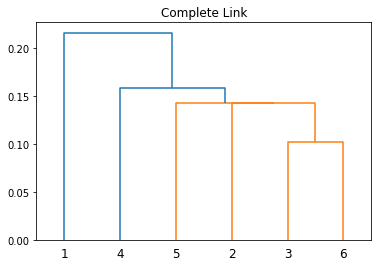

[[0.0, 0.234, 0.216, 0.368, 0.342, 0.235], [0.234, 0.0, 0.143, 0.194, 0.143, 0.244], [0.216, 0.143, 0.0, 0.158, 0.285, 0.102], [0.368, 0.194, 0.158, 0.0, 0.284, 0.22], [0.342, 0.143, 0.285, 0.284, 0.0, 0.386], [0.235, 0.244, 0.102, 0.22, 0.386, 0.0]]


array([[2.   , 5.   , 0.102, 2.   ],
       [1.   , 6.   , 0.143, 3.   ],
       [4.   , 7.   , 0.143, 4.   ],
       [3.   , 8.   , 0.158, 5.   ],
       [0.   , 9.   , 0.216, 6.   ]])

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import math


def cal_distance(x1, x2) -> float:
  return round(math.sqrt((x1[0]-x2[0])**2 + (x1[1] - x2[1]) **2 ), 3)

points = [ (0.4, 0.53), (0.22,0.38), (0.35, 0.32), (0.26,0.19), (0.08,0.41), (0.45, 0.3) ]
labels = [1,2,3,4,5,6]
mat = []

for i, point in enumerate(points):
  mat.append([])
  for next_point in points:
    mat[i].append(cal_distance(point, next_point))


# mat = np.array([[0,1.414,1,1.414,3.162,4.123],
# [1.414,0,1,2,4,5],[1,1,0,1,3,4],[1.414,2,1,0,2,3],[3.162,4,3,2,0,1],[
# 4.123,5,4,3,1,0]])
dists = squareform(mat)
linkage_matrix = linkage(dists, "single") #single, complete
dendrogram(linkage_matrix, labels=labels)
plt.title("Complete Link")
plt.show()
print(mat)
linkage_matrix
